In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('churn_modelling.csv')
df.drop(['RowNumber'],axis=1,inplace=True)
df.rename(columns={
    'CustomerId': 'customer_id',
    'Surname': 'Surname',
    'CreditScore': 'credit_score',
    'Geography': 'country',
    'Gender': 'gender',
    'Age': 'age',
    'Tenure': 'tenure',
    'Balance': 'balance',
    'NumOfProducts': 'products_number',
    'HasCrCard': 'credit_card',
    'IsActiveMember': 'active_member',
    'EstimatedSalary': 'estimated_salary',
    'Exited': 'churn'
}, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   credit_score      10000 non-null  int64  
 3   country           10000 non-null  object 
 4   gender            10000 non-null  object 
 5   age               10000 non-null  int64  
 6   tenure            10000 non-null  int64  
 7   balance           10000 non-null  float64
 8   products_number   10000 non-null  int64  
 9   credit_card       10000 non-null  int64  
 10  active_member     10000 non-null  int64  
 11  estimated_salary  10000 non-null  float64
 12  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


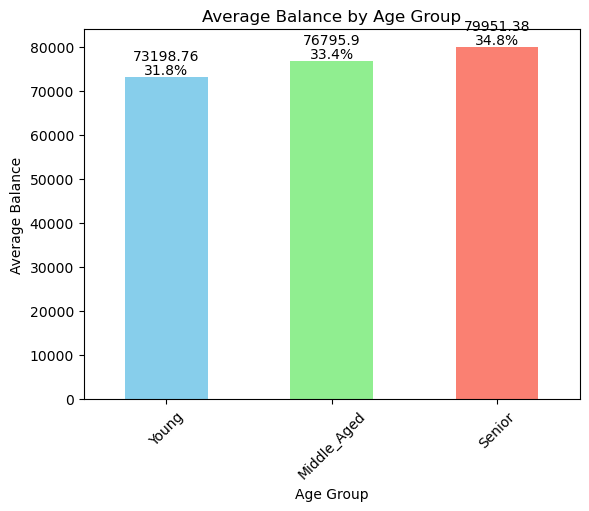

In [4]:
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightcoral']

# Function to calculate average balance by age group
def average_balance_by_age_group(data):
    bins = [0, 30, 50, np.inf]
    labels = ['Young', 'Middle_Aged', 'Senior']
    data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)
    
    # Calculate the average balance for each age group
    avg_balance = data.groupby('age_group')['balance'].mean()
    return avg_balance

# Usage
avg_balance_by_age = average_balance_by_age_group(df)

# Bar plot for average balance by age group
ax = avg_balance_by_age.plot(kind='bar', color=colors)

# Calculate total height for percentage labels
total_height = sum(avg_balance_by_age)

# showing percentages and values on the bars
for p in ax.patches:
    height = p.get_height()
    # Calculate the percentage for each bar
    percentage = (height / total_height) * 100
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{percentage:.1f}%', ha="center", va="bottom")
    ax.annotate(str(round(height, 2)), 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', 
                va='center', 
                xytext=(0, 15), 
                textcoords='offset points')

plt.title('Average Balance by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.ylabel('Average Balance')
plt.show()

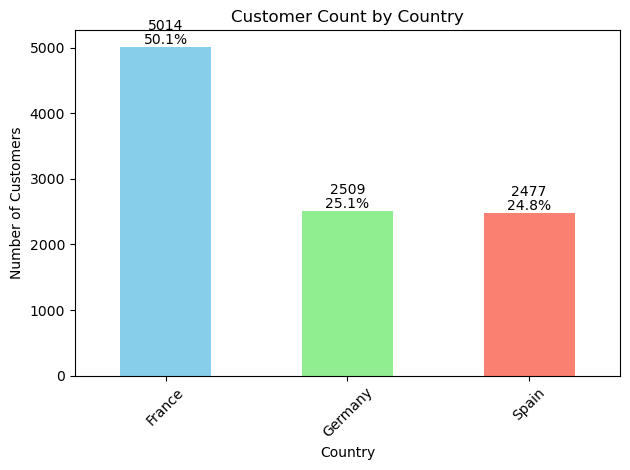

In [5]:
def count_customers_by_country(data):
    # Use value_counts() to count customers by country, which returns a Pandas Series
    country_count = data['country'].value_counts()
    return country_count

# Usage
country_customer_count = count_customers_by_country(df)

# Convert to Series (if not already) and plot
ax = country_customer_count.plot(kind='bar', color=colors)

# Calculate total height for percentage labels
total_height = country_customer_count.sum()

# Show percentages and values on the bars
for p in ax.patches:
    height = p.get_height()
    # Calculate the percentage for each bar
    percentage = (height / total_height) * 100
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{percentage:.1f}%', ha="center", va="bottom")
    ax.annotate(str(round(height, 2)), 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', 
                va='center', 
                xytext=(0, 15), 
                textcoords='offset points')

# Customize the plot
plt.title('Customer Count by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# List of churned customers
churned_customers = df[df['churn'] == 1]['customer_id'].tolist()

# List of retained customers
retained_customers = df[df['churn'] == 0]['customer_id'].tolist()

# Display the count of churned and retained customers
print(f"Number of churned customers: {len(churned_customers)}")
print(f"Number of retained customers: {len(retained_customers)}")

Number of churned customers: 2037
Number of retained customers: 7963


In [7]:
# List of high-value customers with balance > 100,000
high_value_customers = [customer_id for customer_id, balance in zip(df['customer_id'], df['balance']) if balance > 100000]

# Display the count of high-value customers
print(f"Number of high-value customers (balance > 100,000): {len(high_value_customers)}")

Number of high-value customers (balance > 100,000): 4799


In [8]:
def customer_statistics_by_country(data):
    country_stats = {}

    # Group data by 'country'
    country_groups = data.groupby('country')

    for country, group in country_groups:
        total_customers = len(group)
        churned = group[group['churn'] == 1].shape[0]
        retained = group[group['churn'] == 0].shape[0]
        avg_balance = group['balance'].mean()
        
        # Populate the dictionary
        country_stats[country] = {
            'Total Customers': total_customers,
            'Churned Customers': churned,
            'Retained Customers': retained,
            'Average Balance': round(avg_balance, 2)
        }
    
    return country_stats

# Get customer statistics by country
country_stats = customer_statistics_by_country(df)

# Display the statistics
for country, stats in country_stats.items():
    print(f"\nCountry: {country}")
    for key, value in stats.items():
        print(f"{key}: {value}")


Country: France
Total Customers: 5014
Churned Customers: 810
Retained Customers: 4204
Average Balance: 62092.64

Country: Germany
Total Customers: 2509
Churned Customers: 814
Retained Customers: 1695
Average Balance: 119730.12

Country: Spain
Total Customers: 2477
Churned Customers: 413
Retained Customers: 2064
Average Balance: 61818.15


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 customer_id         0
Surname             0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
age_group           0
dtype: int64


In [10]:
# Impute missing values for numerical columns with median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Impute missing values for categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify if all missing values are handled
print("\nMissing Values After Imputation:\n", df.isnull().sum())


Missing Values After Imputation:
 customer_id         0
Surname             0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
age_group           0
dtype: int64


In [11]:
# List of categorical columns
categorical_cols = ['country', 'gender', 'credit_card', 'active_member','products_number']

# Display unique values for each categorical column
for col in categorical_cols:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'country': ['France' 'Spain' 'Germany']
Unique values in 'gender': ['Female' 'Male']
Unique values in 'credit_card': [1 0]
Unique values in 'active_member': [1 0]
Unique values in 'products_number': [1 3 2 4]


In [12]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the transformed dataset
print("\nTransformed Dataset with One-Hot Encoding:\n", df_encoded.head())



Transformed Dataset with One-Hot Encoding:
    customer_id   Surname  credit_score  age  tenure    balance  \
0     15634602  Hargrave           619   42       2       0.00   
1     15647311      Hill           608   41       1   83807.86   
2     15619304      Onio           502   42       8  159660.80   
3     15701354      Boni           699   39       1       0.00   
4     15737888  Mitchell           850   43       2  125510.82   

   estimated_salary  churn    age_group  country_Germany  country_Spain  \
0         101348.88      1  Middle_Aged            False          False   
1         112542.58      0  Middle_Aged            False           True   
2         113931.57      1  Middle_Aged            False          False   
3          93826.63      0  Middle_Aged            False          False   
4          79084.10      0  Middle_Aged            False           True   

   gender_Male  credit_card_1  active_member_1  products_number_2  \
0        False           True         

In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to binary columns
binary_cols = ['gender', 'credit_card', 'active_member']
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Check the results
print("\nDataset after Label Encoding:\n", df.head())


Dataset after Label Encoding:
    customer_id   Surname  credit_score country  gender  age  tenure  \
0     15634602  Hargrave           619  France       0   42       2   
1     15647311      Hill           608   Spain       0   41       1   
2     15619304      Onio           502  France       0   42       8   
3     15701354      Boni           699  France       0   39       1   
4     15737888  Mitchell           850   Spain       0   43       2   

     balance  products_number  credit_card  active_member  estimated_salary  \
0       0.00                1            1              1         101348.88   
1   83807.86                1            0              1         112542.58   
2  159660.80                3            1              0         113931.57   
3       0.00                2            0              0          93826.63   
4  125510.82                1            1              1          79084.10   

   churn    age_group  
0      1  Middle_Aged  
1      0  Middle_A

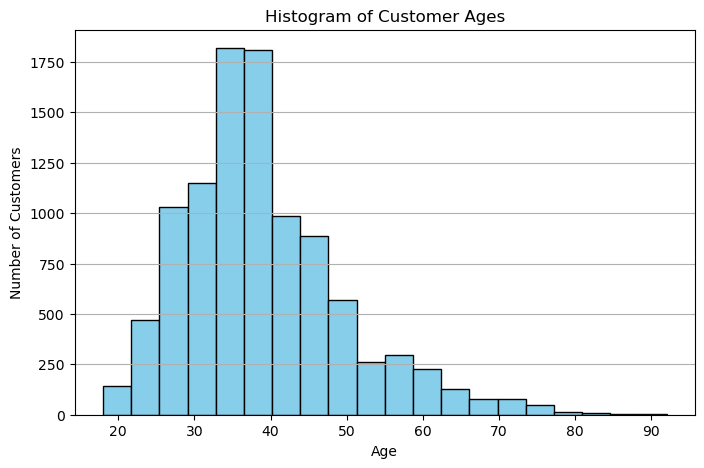

In [14]:
# Histogram of customer ages
plt.figure(figsize=(8, 5))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

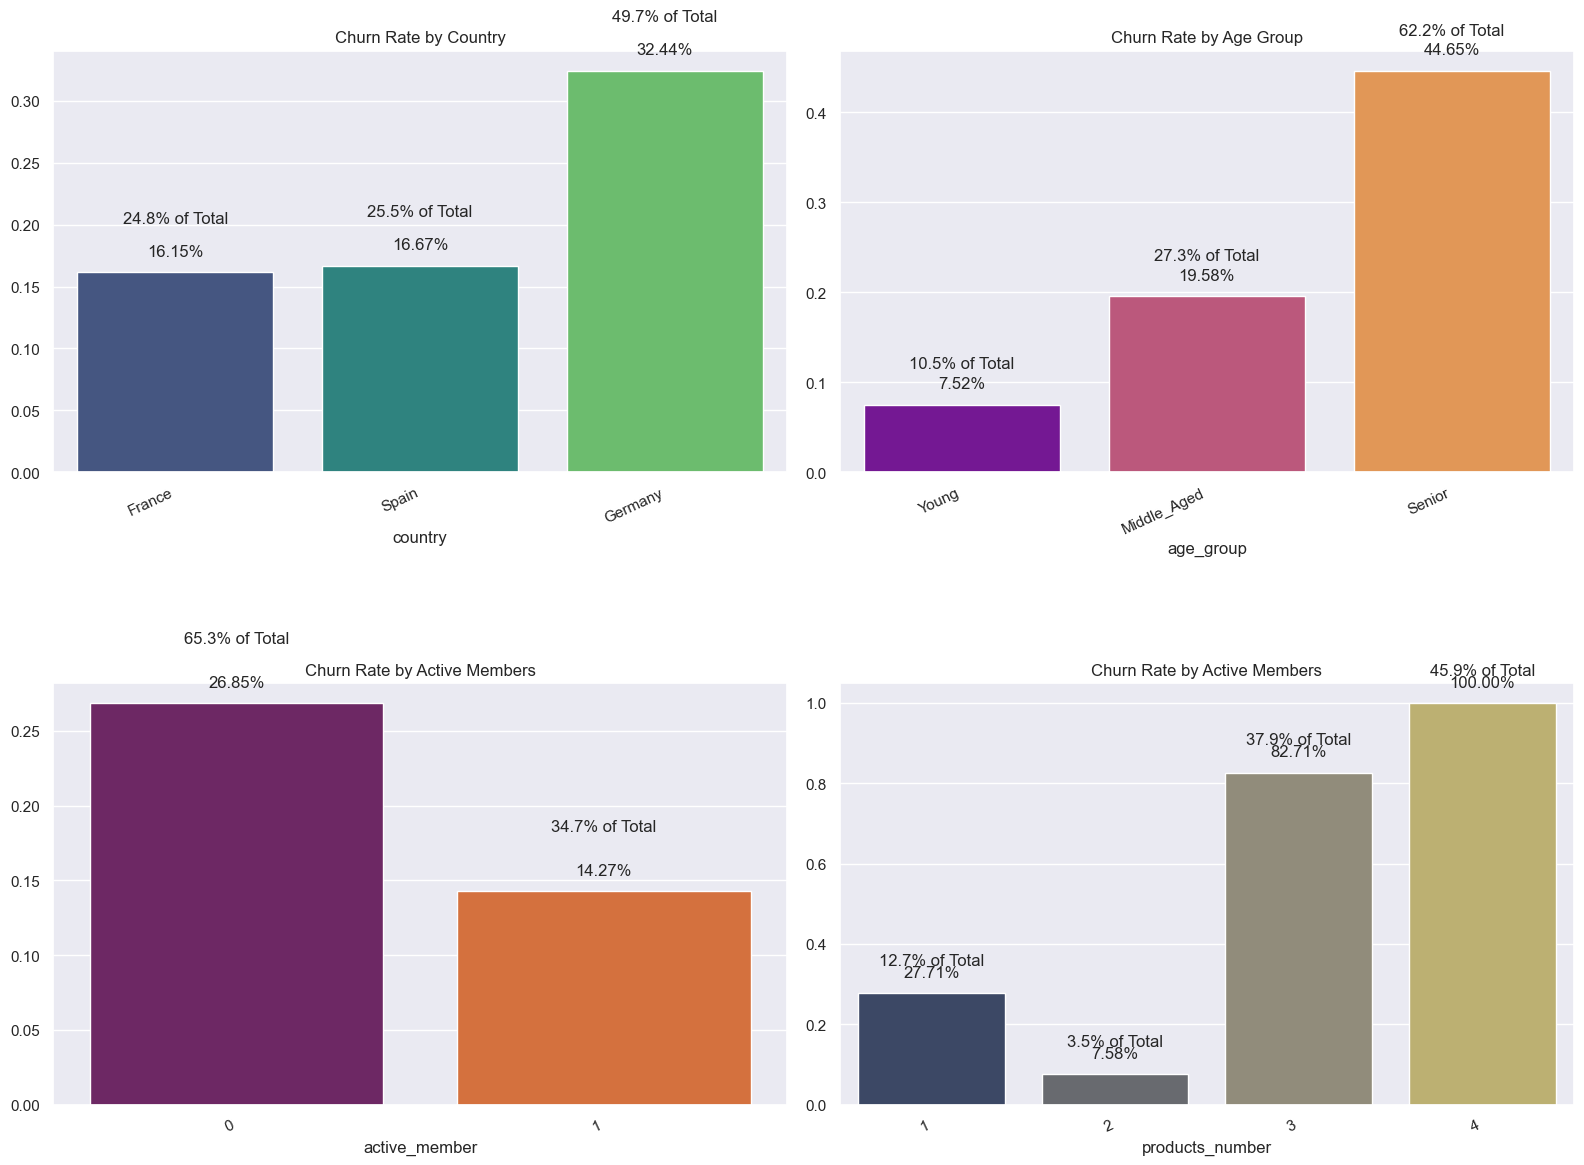

In [15]:
sns.set()
# sns.set_palette(custom_palette)
f, axes = plt.subplots(2,2,figsize=(16, 11))
# ax = sns.countplot(x = 'REFER_TYPE', hue = 'REFER_TYPE', data = df_raw, ax=axes[0][0], order=custom_order)
# Calculate churn rate by country
churn_rate_by_country = df.groupby('country')['churn'].mean().sort_values()
total_count = churn_rate_by_country.sum()
# Bar plot of churn rate by country
ax=sns.barplot(x=churn_rate_by_country.index, y=churn_rate_by_country.values, ax=axes[0][0],palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.04, f'{(height/total_count)*100:.1f}% of Total', ha="center")
    
for p in ax.patches:
    height = p.get_height()
    percentage = height * 100
    ax.annotate(f'{percentage:.2f}%',  # Round to 2 decimal places
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', 
                va='center', 
                xytext=(0, 15), 
                textcoords='offset points')
ax.set_title('Churn Rate by Country')

# Calculate churn rate by age_group
churn_rate_by_age_group = df.groupby('age_group')['churn'].mean().sort_values()
total_count = churn_rate_by_age_group.sum()
# Bar plot of churn rate by country
ax=sns.barplot(x=churn_rate_by_age_group.index, y=churn_rate_by_age_group.values,ax=axes[0][1], palette='plasma')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.04, f'{(height/total_count)*100:.1f}% of Total', ha="center")
    
for p in ax.patches:
    height = p.get_height()
    percentage = height * 100
    ax.annotate(f'{percentage:.2f}%',  # Round to 2 decimal places
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', 
                va='center', 
                xytext=(0, 15), 
                textcoords='offset points')
ax.set_title('Churn Rate by Age Group')    
# Calculate churn rate by country
churn_rate_by_active_member = df.groupby('active_member')['churn'].mean().sort_values()
total_count = churn_rate_by_active_member.sum()
# Bar plot of churn rate by country
ax=sns.barplot(x=churn_rate_by_active_member.index, y=churn_rate_by_active_member.values, ax=axes[1][0], palette='inferno')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.04, f'{(height/total_count)*100:.1f}% of Total', ha="center")
    
for p in ax.patches:
    height = p.get_height()
    percentage = height * 100
    ax.annotate(f'{percentage:.2f}%',  # Round to 2 decimal places
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', 
                va='center', 
                xytext=(0, 15), 
                textcoords='offset points')
ax.set_title('Churn Rate by Active Members')
# Calculate churn rate by products_number
churn_rate_by_products_number = df.groupby('products_number')['churn'].mean().sort_values()
total_count = churn_rate_by_products_number.sum()
# Bar plot of churn rate by country
ax=sns.barplot(x=churn_rate_by_products_number.index, y=churn_rate_by_products_number.values, ax=axes[1][1],palette='cividis')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.07, f'{(height/total_count)*100:.1f}% of Total', ha="center")
    
for p in ax.patches:
    height = p.get_height()
    percentage = height * 100
    ax.annotate(f'{percentage:.2f}%',  # Round to 2 decimal places
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', 
                va='center', 
                xytext=(0, 15), 
                textcoords='offset points')
ax.set_title('Churn Rate by Active Members')
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right')
# plt.legend(bbox_to_anchor=(1, 1), loc='center left')
# plt.figure(figsize=(17,17))
plt.tight_layout()                     
plt.subplots_adjust(hspace=0.5, bottom= -0.01)
# plt.subplots_adjust(vspace=0.5)
plt.show()

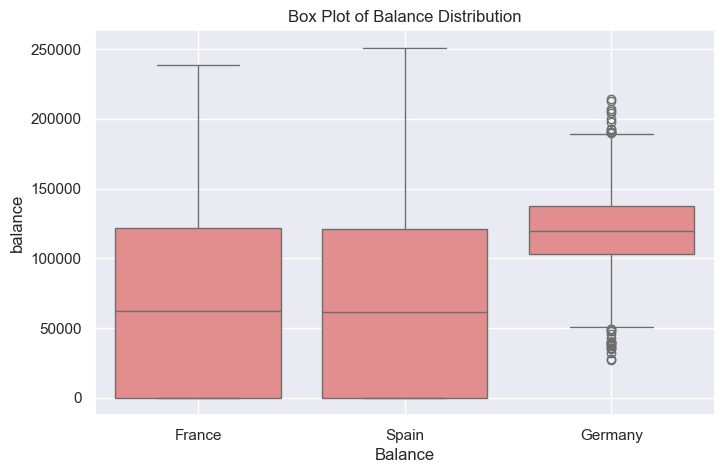

In [16]:
# Box plot of balance distribution per country
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['balance'],x=df['country'], color='lightcoral')
plt.title('Box Plot of Balance Distribution')
plt.xlabel('Balance')
plt.grid(axis='x')
plt.show()

In [17]:
# Selecting the features and target variable
selected_features = ['gender', 'age', 'balance', 'products_number', 'active_member']
X = df[selected_features]  # Features
y = df['churn']  # Target variable

# Check the feature types and handle any non-numeric data
print("\nFeature Types:\n", X.dtypes)


Feature Types:
 gender               int32
age                  int64
balance            float64
products_number      int64
active_member        int64
dtype: object


In [18]:
# Convert 'active_member' to numerical if needed
if X['active_member'].dtype == 'object':
    X['active_member'] = X['active_member'].map({'Yes': 1, 'No': 0})

In [19]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the split datasets
print(f"\nTraining Set Shape: {X_train.shape}, Testing Set Shape: {X_test.shape}")


Training Set Shape: (8000, 5), Testing Set Shape: (2000, 5)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Model Accuracy: 0.81

Confusion Matrix:
 [[1560   47]
 [ 327   66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.58      0.17      0.26       393

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.78      0.81      0.77      2000



In [21]:
# Summary of Findings

# Customer Demographics Analysis
-Majority of Customers are in senior age group.
-France has the highest number of customers, and the Lowest churn rate.

### Churn Rate Patterns
- Germany shows the highest churn rate among all countries.
- Customers aged 50+(senior) are more likely to churn compared to younger customers.

### Risk Factors for Customer Churn
-inactive membership, and low product usage are significant churn indicators.
- Active members and customers using multiple products have lower churn rates.

### Recommendations
- Implement targeted retention strategies for at-risk age groups and countries.
- Encourage customers to become active members by offering loyalty rewards.
- Promote additional bank products to increase engagement and reduce churn.
- Introduce financial advisory services to improve customers' credit scores.


SyntaxError: invalid syntax (2279487901.py, line 4)